# Classifying Palmer Penguins
Mihir Singh

## Abstract
By developing a model to classify the Palmer penguins, there can be a more accurate species identification of penguins given a certain set of features. Comparing the different features in the Palmer penguin data set, it was determined that the culmen length, culmen depth, and island are useful features for determining a penguin's species. Different types of classification models were also compared (logistic regress, decision tree, and SVC). It was determined that a logistic regression model looking at a penguins island of residence, culmen depth, and culmen depth would be a highly accurate model. When it was applied to the testing data, it received an accuracy score of %100.

First we must access the training data. We can also import any libraries we might need later on.

In [91]:
import pandas as pd
import seaborn as sns
import numpy as np

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


## Data Preparation
This code prepares qualitative columns in the data. Provided by Professor Phil Chodrow.

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

X_train.head()


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True



## Explore
No we can then create visualizations that give us some new understanding about the Palmer Penguins.

We can first look to see if there is any difference in body mass by island. To see this, we can create a box plot with the body mass being on the y-axis and the islands being the discrete categories making up the x-axis.

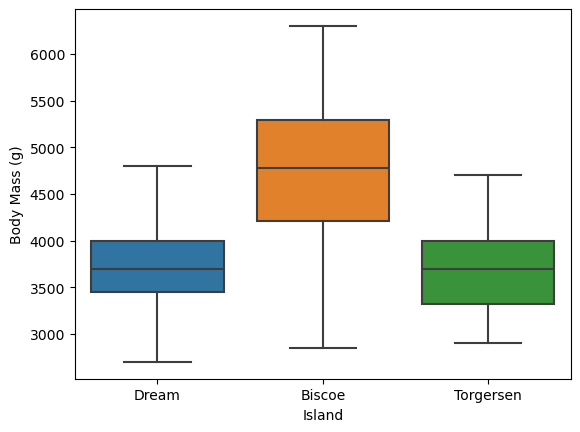

In [93]:
p1 = sns.boxplot(train, x = "Island", y = "Body Mass (g)", )

In p1 we can see that penguins on Biscoe island are generally much larger in body mass than penguins on other islands.

We can then also look to see if the difference is holds within species. That is, is a Chinstrap penguin on Biscoe island generally bigger than a Chinstrap penguin on Torgersen island, or is it that a certain species of penguin dominates Biscoe island.

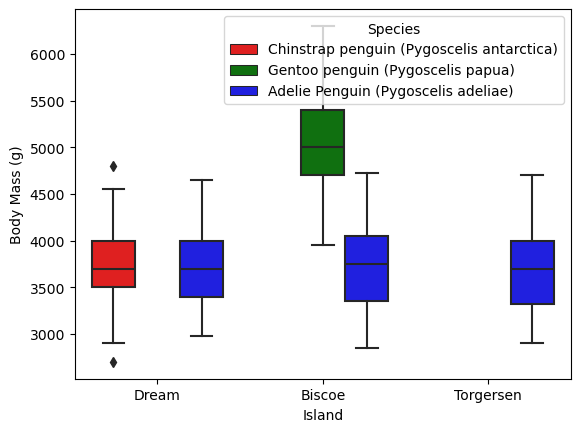

In [94]:
p2 = sns.boxplot(train, x = "Island", y = "Body Mass (g)", hue = "Species" ,palette=["r", "g", 'b'])

In p2 we find that a reason that the penguins on Biscoe Island are heavier may be because of its population of Gentoo Penguins. There are no other islands with a Gentoo penguin population, and they seem to be much heavier than other penguin species. 

We can check this by looking at the mean body mass of penguins across species.

In [95]:
summaryTable = train.groupby(['Species']).aggregate(avgMass=('Body Mass (g)', 'mean'))
print(summaryTable)

                                               avgMass
Species                                               
Adelie Penguin (Pygoscelis adeliae)        3718.487395
Chinstrap penguin (Pygoscelis antarctica)  3743.421053
Gentoo penguin (Pygoscelis papua)          5039.948454


Indeed, we see that Gentoo penguins are, on average, much heavier than other penguins. So it makes sense to conclude that their prescence on Biscoe Island and abscence on other islands might be a big reason the average penguin on Biscoe Island is larger than the average penguin on other islands.

It might also be interesting to see if penguins with a bigger culmen length or depth are heavier. Again we can plot body mass and culmen length/depth to see this relationship.

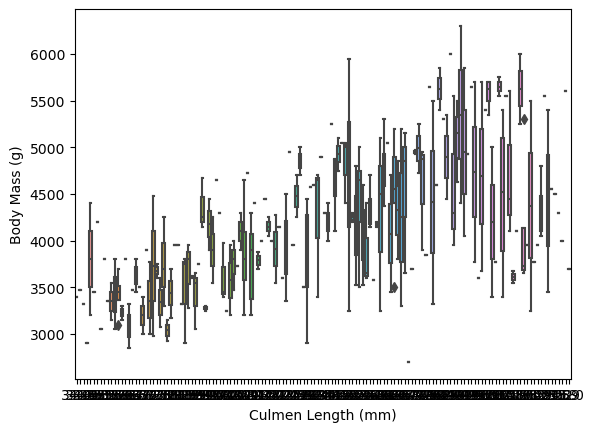

In [96]:
p3 = sns.boxplot(train, x = "Culmen Length (mm)", y = "Body Mass (g)")

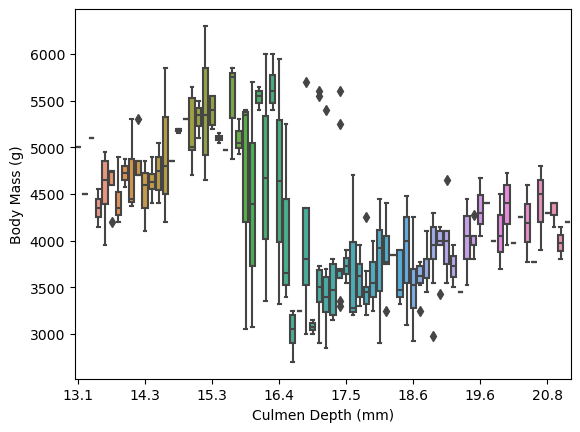

In [97]:
p3 = sns.boxplot(train, x = "Culmen Depth (mm)", y = "Body Mass (g)")
p3.set_xticks([0,10,20,30,40,50,60,70])

We see that as culmen length increases, the mass of the penguin generally increases, but the same is not true for culmen depth. In fact, the body mass is highest when the culmen depth reaches around 15-16 mm. These measurements line up with the culmen depth range of Chinstrap penguins so we can conclude that culmen depth doesn't really have that much of an effect on body mass.

## Choosing Features and Models
From our visualizations we can infer that body mass and the island the penguin is on might be useful features. However, we should probably look for 3 good features.

We can start by eliminating features with low variance. 

In [98]:
from sklearn.feature_selection import VarianceThreshold
X = X_train

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
newTraining = sel.fit_transform(X)

First, we can iterate through every qualitative and quantitative variable and create different combinations of features to test. 

Then we can start preparing models. The models I will use are a logistic regression, decision tree, and svc classifier.

Finally, we can cross-validate these models.

In [99]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score

# values to keep track of best score from each classifier
LRBest = 0
DTBest = 0
SVCBest = 0
LRBestCols = []
DTBestCols = []
SVCBestCols = []

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', "Body Mass (g)"]

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 
    
    # logistic regression
    LR = LogisticRegression(max_iter=5000)
    LR.fit(X_train[cols], y_train)
    scoreLR = LR.score(X_train[cols], y_train)
    if scoreLR > LRBest:
      LRBest = scoreLR
      LRBestCols = cols
    
    # decision tree
    DT = DecisionTreeClassifier(max_depth=20)
    DT.fit(X_train[cols], y_train)
    scoreDT = DT.score(X_train[cols], y_train)
    if scoreDT > DTBest:
      DTBest = scoreDT
      DTBestCols = cols
    
    # SVC
    SVCModel = SVC(gamma='auto')
    SVCModel.fit(X_train[cols], y_train)
    scoreSVC = SVCModel.score(X_train[cols], y_train)
    if scoreSVC > SVCBest:
      SVCBest = scoreSVC
      SVCBestCols = cols

print(LRBest, " ", LRBestCols)
print(DTBest, " ", DTBestCols)
print(SVCBest, " ", SVCBestCols)

# cross validate models
cv_scores_LR = cross_val_score(LR, X_train, y_train, cv=5)
print((cv_scores_LR).mean())

cv_scores_DT = cross_val_score(DT, X_train, y_train, cv=5)
print((cv_scores_DT).mean())

cv_scores_SVC = cross_val_score(SVCModel, X_train, y_train, cv=5)
print((cv_scores_SVC).mean())

0.99609375   ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)']
1.0   ['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.99609375   ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)']
1.0
0.9569381598793363
0.6407239819004525


While we do find that the decision tree classifier does have a After cross-validating the models, it seems that a logistic regression is best. We can now look at creating a logistic regression model with the three best features for it (which were Island, Culmen Length, and Culmen Depth). 

We found these three best features by running through every possible combination of three features (with one qualitative and 2 quantitative) and keep track of which combination led to the high model score. 

## Testing
With our models and features selected, we can test our decisions/model.

In [100]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

cols = ['Culmen Length (mm)', 'Culmen Depth (mm)','Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
X_test, y_test = prepare_data(test)
LR.fit(X_train[cols], y_train)
LR.score(X_test[cols], y_test)

1.0

## Plotting Decision Regions
We can plot the decision regions of our classifiers to get a better understanding of the conclusions our model drew.

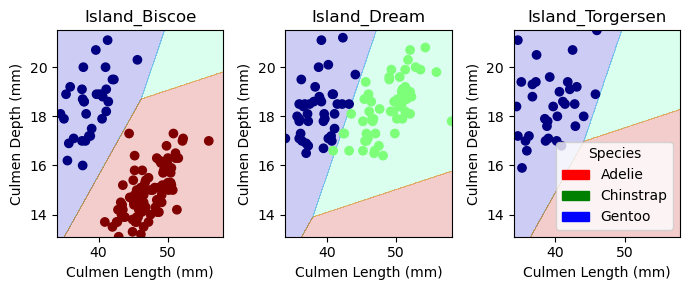

In [101]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()
      
plot_regions(LR, X_train[cols], y_train)

## Confusion Matrix
We can also take a look at a confusion matrix to give us a better understanding of our model's accuracy.

In [103]:
from sklearn.metrics import confusion_matrix
y_test_pred = LR.predict(X_test[cols])
y_test_pred
C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

From this we see that we correctly predict every penguin. Since there are no values outside the diagonal of the matrix, we don't have any false predictions. Given that we use island as a feature, we will probably see more errors predicting Adelie penguins as Chinstrap or Gentoo. This is because the Adelie penguin is the only penguin species that is present on every island so it is probably easiest for our model to confuse it for another species.

## Discussion
A logistic regression model trained by looking at the Palmer penguin dataset features of culmen length, culmen depth, and home island was highly accurate, getting an accuracy score of %100 on the test data. 

By finding this model, I learned about the importance of conducting thorough research on your data. Much of the initial work did not involve creating models but exploring the features and characteristics of the dataset. Only after this exploration was I able to develop an intuition for what features might be useful in creating a model. However, just exploring the data is not enough to create a good model, cross-validation and eliminating features with low variance were also important techniques employed in this process, guiding against overfitting and helping narrow down on useful features respectively.  